# Capture

In [1]:
push!(LOAD_PATH,"../src/")

using CaptureRate
using Plots

┌ Info: Recompiling stale cache file /Users/kohn/.julia/compiled/v1.0/CaptureRate.ji for CaptureRate [top-level]
└ @ Base loading.jl:1184


# $\mathrm{GaN:C_N}$ $σ=0.01$

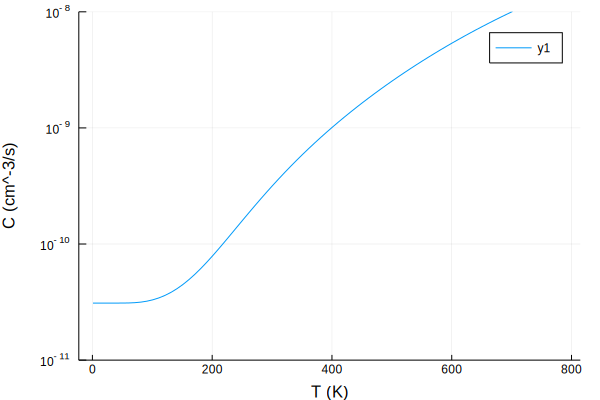

In [10]:
cc = CaptureRate.calc_harm_wave_func(0.042, 0.036,
        -1.61, -1.02; Qi=-10, Qf=10, NQ=2000, nev=45)
CaptureRate.plot_potentials(cc)
CaptureRate.calc_overlap!(cc; cut_off=0.25, σ=0.01)

T_range = 1:10:800
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
plt = plot(T_range, c*4*6) # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-11, 1E-8)

## Cut_off test

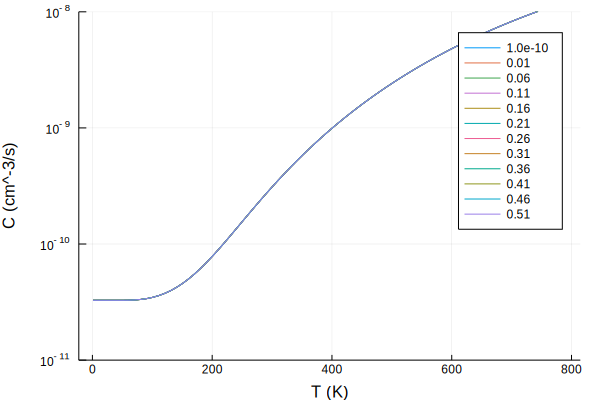

In [3]:
cc = CaptureRate.calc_harm_wave_func(0.042, 0.036,
        -1.61, -1.02; Qi=-10, Qf=10, NQ=3000, nev=40)
# CaptureRate.plot_potentials(cc)
# ylims!(-1.5, 0.5)
# xlims!(-4, 3)
T_range = 1:10:800
cutoff = 1E-10
CaptureRate.calc_overlap!(cc; cut_off=cutoff, σ=0.01)
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
plot(T_range, c*4*6, label=cutoff) # degeneracy * Sommerfeld factor

for cutoff in range(0.01, 0.51, length=11)
    CaptureRate.calc_overlap!(cc; cut_off=cutoff, σ=0.01)
    c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
    plot!(T_range, c*4*6, label=cutoff) # degeneracy * Sommerfeld factor
end
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-11, 1E-8)

## sigma test

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.04200755733857459


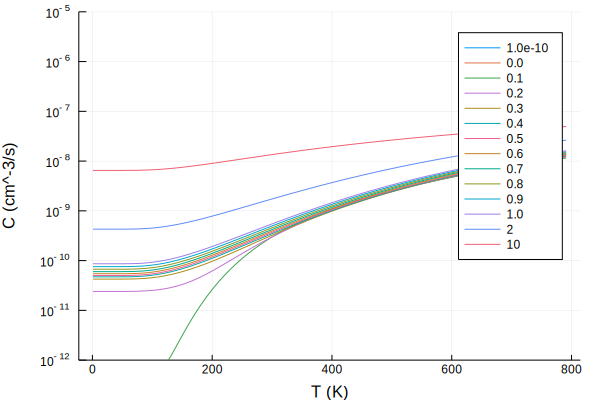

In [32]:
cc = CaptureRate.calc_harm_wave_func(0.042, 0.036,
        -1.61, -1.02; Qi=-10, Qf=10, NQ=5000, nev=40)
T_range = 1:10:800

σ = 1E-10
CaptureRate.calc_overlap!(cc; cut_off=0.4, σ=σ)
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
plot(T_range, c*4*6, label=σ) # degeneracy * Sommerfeld factor
println(c*4*6)
δϵ = abs(cc.ϵ1[2] - cc.ϵ1[1])
println(δϵ)
for f in range(0, 1, length=11)
    CaptureRate.calc_overlap!(cc; cut_off=0.4, σ=δϵ*f)
    c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
    plot!(T_range, c*4*6, label=f) # degeneracy * Sommerfeld factor
end

f = 2
CaptureRate.calc_overlap!(cc; cut_off=0.4, σ=δϵ*f)
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
plot!(T_range, c*4*6, label=f) # degeneracy * Sommerfeld factor


f = 10
CaptureRate.calc_overlap!(cc; cut_off=0.4, σ=δϵ*f)
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
plot!(T_range, c*4*6, label=f) # degeneracy * Sommerfeld factor


yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-12, 1E-5)